In [3]:
import networkx as nx
from pynauty import Graph, autgrp
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

NUMBER_OF_GRAPHS = 4985


In [4]:
graphs = nx.read_graph6("positive_graphs.g6")
pynauty_graphs = []
nodes_counts = np.zeros(NUMBER_OF_GRAPHS)
for i, graph in enumerate(graphs):
    num_of_nodes = int(graph.number_of_nodes())
    nodes_counts[i] = num_of_nodes
    pynauty_graph = Graph(num_of_nodes)
    pynauty_graph.set_adjacency_dict(dict(graph.adjacency()))
    pynauty_graphs.append((pynauty_graph, num_of_nodes, graph.edges()))

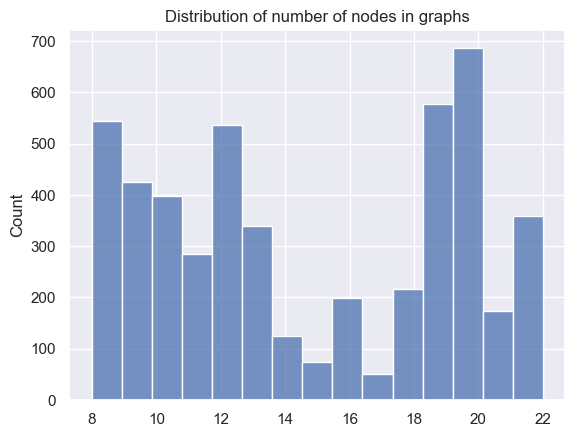

In [8]:

sns.set_theme()
sns.histplot(nodes_counts, bins=15).set(title="Distribution of number of nodes in graphs")
plt.show()

In [9]:
min_nodes = np.min(nodes_counts)
max_nodes = np.max(nodes_counts)
avg_nodes = np.mean(nodes_counts)
print(f"Min number of nodes: {min_nodes}")
print(f"Max number of nodes: {max_nodes}")
print(f"Avg number of nodes: {avg_nodes}")

Min number of nodes: 8.0
Max number of nodes: 22.0
Avg number of nodes: 14.66740220661986


In [10]:
group_sizes = np.zeros(NUMBER_OF_GRAPHS)
for i, (Graph, num_of_nodes, edge_list) in enumerate(pynauty_graphs):
    generators_raw, grpsize1, grpsize2, _, _ = autgrp(Graph)
    group_size = grpsize1 * 10**grpsize2
    group_sizes[i] = group_size

In [11]:
min_group_size = np.min(group_sizes)
max_group_size = np.max(group_sizes)
avg_group_size = np.mean(group_sizes)
print(f"Min automorphism group size: {min_group_size}")
print(f"Max automorphism group size: {max_group_size}")
print(f"Avg automorphism group size: {avg_group_size}")

Min automorphism group size: 2.0
Max automorphism group size: 19200.0
Avg automorphism group size: 89.22627883650952
